In [218]:
import pandas as pd
import os
import numpy as np

# Acceder a la ruta donde se encuentra los archivos
ruta = os.getcwd()

In [219]:
# Leemos el archivo .csv
data = pd.read_csv(ruta+r"\TwitchDataSet.csv")
data.head(3)

,profile picture,top count,screen name,watch time,stream time,peak viewers,average viewers,followers,followers gained,views gained,partnered,mature,language,completa name,first category,second category,third category
0,https://static-cdn.jtvnw.net/jtv_user_pictures...,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,True,False,English,xQcOW,Just Chatting,Among Us,Overwatch
1,https://static-cdn.jtvnw.net/jtv_user_pictures...,2,Gaules,6314532585,515595,387315,12254,1966465,1141123,112807468,True,True,Portuguese,Gaules,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,https://static-cdn.jtvnw.net/jtv_user_pictures...,3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,True,False,English,summit1g,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V


In [220]:
# Vemos la cantidad de registros que tiene el dataset
data.shape

(8800, 17)

In [221]:
# Filtramos solo los que sean para menores de 18 años
mascara = data["mature"] == False

data2 = data[mascara]
data2.shape

(6219, 17)

In [222]:
# Vemos la cantidad de registros que hay por idioma, para seleccionar los primeros 8
datosResumidos = data2["language"].value_counts()
datosResumidos

English       2719
Spanish        567
Korean         526
Russian        493
Portuguese     381
French         329
German         277
Italian        164
Chinese        139
Turkish        129
Japanese       126
Polish         117
Arabic          57
Thai            46
Czech           27
Hungarian       26
Danish          18
Finnish         15
Dutch           10
Other           10
Greek           10
Swedish          9
Bulgarian        9
Slovak           4
Norwegian        3
Hindi            3
Romanian         3
Ukrainian        1
Indonesian       1
Name: language, dtype: int64

In [223]:
# Generamos una lista para seleccionar los idiomas más rápido
datosResumidos.index

Index(['English', 'Spanish', 'Korean', 'Russian', 'Portuguese', 'French',
       'German', 'Italian', 'Chinese', 'Turkish', 'Japanese', 'Polish',
       'Arabic', 'Thai', 'Czech', 'Hungarian', 'Danish', 'Finnish', 'Dutch',
       'Other', 'Greek', 'Swedish', 'Bulgarian', 'Slovak', 'Norwegian',
       'Hindi', 'Romanian', 'Ukrainian', 'Indonesian'],
      dtype='object')

In [224]:
# Nos quedamos solo con los registros donde su idioma este en la lista "idiomas"
idiomas = ['English', 'Spanish', 'Korean', 'Russian', 'Portuguese', 'French', 'German', 'Italian']

mascaraIdiomas = data2["language"].isin(idiomas)

data3 = data2[mascaraIdiomas]
data3.shape

(5456, 17)

In [225]:
data3.head(2)

,profile picture,top count,screen name,watch time,stream time,peak viewers,average viewers,followers,followers gained,views gained,partnered,mature,language,completa name,first category,second category,third category
0,https://static-cdn.jtvnw.net/jtv_user_pictures...,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,True,False,English,xQcOW,Just Chatting,Among Us,Overwatch
2,https://static-cdn.jtvnw.net/jtv_user_pictures...,3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,True,False,English,summit1g,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V


In [226]:
# Reemplazar los nombres de las columnas utilizando el método set_axis()
data3 = data3.set_axis(['FOTO_PERFIL', 'CONTEO_SUPERIOR', 'NOMBRE_PANTALLA', 'TIEMPO_VISTA', 'TIEMPO_TRANSMISION',
                          'ESPECTADORES_MAXIMO', 'ESPECTADORES_PROMEDIO', 'SEGUIDORES', 'SEGUIDORES_GANADOS', 'VISTAS_GANADAS',
                          'PATROCINADO', 'EDAD', 'IDIOMA', 'NOMBRE_COMPLETO', 'CATEGORIA_1',
                          'CATEGORIA_2', 'CATEGORIA_3'], axis=1)
data3.head(2)

,FOTO_PERFIL,CONTEO_SUPERIOR,NOMBRE_PANTALLA,TIEMPO_VISTA,TIEMPO_TRANSMISION,ESPECTADORES_MAXIMO,ESPECTADORES_PROMEDIO,SEGUIDORES,SEGUIDORES_GANADOS,VISTAS_GANADAS,PATROCINADO,EDAD,IDIOMA,NOMBRE_COMPLETO,CATEGORIA_1,CATEGORIA_2,CATEGORIA_3
0,https://static-cdn.jtvnw.net/jtv_user_pictures...,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,True,False,English,xQcOW,Just Chatting,Among Us,Overwatch
2,https://static-cdn.jtvnw.net/jtv_user_pictures...,3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,True,False,English,summit1g,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V


In [227]:
# Verificamos los tipos de datos de las columnas --> Estan ok
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5456 entries, 0 to 8799
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   FOTO_PERFIL            5456 non-null   object
 1   CONTEO_SUPERIOR        5456 non-null   int64 
 2   NOMBRE_PANTALLA        5456 non-null   object
 3   TIEMPO_VISTA           5456 non-null   int64 
 4   TIEMPO_TRANSMISION     5456 non-null   int64 
 5   ESPECTADORES_MAXIMO    5456 non-null   int64 
 6   ESPECTADORES_PROMEDIO  5456 non-null   int64 
 7   SEGUIDORES             5456 non-null   int64 
 8   SEGUIDORES_GANADOS     5456 non-null   int64 
 9   VISTAS_GANADAS         5456 non-null   int64 
 10  PATROCINADO            5456 non-null   bool  
 11  EDAD                   5456 non-null   bool  
 12  IDIOMA                 5456 non-null   object
 13  NOMBRE_COMPLETO        5456 non-null   object
 14  CATEGORIA_1            5453 non-null   object
 15  CATEGORIA_2          

In [228]:
# Eliminamos las columnas que no sirven
columnasAEliminar = ['CONTEO_SUPERIOR', 'NOMBRE_PANTALLA', 'EDAD']

data3 = data3.drop(columns=columnasAEliminar)
data3.shape

(5456, 14)

In [229]:
# Reemplazar los datos de la columna "PATROCINADO"
# Creamos las mascaras
mascaraTruePatrocinado = data3["PATROCINADO"] == True
mascaraFalsePatrocinado = data3["PATROCINADO"] == False

# Reemplazamos los datos utilizando las mascaras
data3["PATROCINADO"][mascaraTruePatrocinado] = "Con Patrocinador"
data3["PATROCINADO"][mascaraFalsePatrocinado] = "Sin Patrocinador"

data3["PATROCINADO"].value_counts()



C:\Users\DH\AppData\Local\Temp\ipykernel_36164\2344182647.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["PATROCINADO"][mascaraTruePatrocinado] = "Con Patrocinador"


Con Patrocinador    4850
Sin Patrocinador     606
Name: PATROCINADO, dtype: int64

In [230]:
# Generar el ID único utilizando un contador
id_prefix = "STREAMER_"
id_counter = 1

def generate_unique_id():
    global id_counter
    unique_id = f"{id_prefix}{id_counter:05d}"
    id_counter += 1
    return unique_id

# Agregar una nueva columna "ID" al DataFrame con los IDs únicos generados
data3['ID_STREAMER'] = data3.apply(lambda row: generate_unique_id(), axis=1)


In [231]:
data3.head()

,FOTO_PERFIL,TIEMPO_VISTA,TIEMPO_TRANSMISION,ESPECTADORES_MAXIMO,ESPECTADORES_PROMEDIO,SEGUIDORES,SEGUIDORES_GANADOS,VISTAS_GANADAS,PATROCINADO,IDIOMA,NOMBRE_COMPLETO,CATEGORIA_1,CATEGORIA_2,CATEGORIA_3,ID_STREAMER
0,https://static-cdn.jtvnw.net/jtv_user_pictures...,7333609065,215670,222720,32913,3691010,2051895,109735389,Con Patrocinador,English,xQcOW,Just Chatting,Among Us,Overwatch,STREAMER_00001
2,https://static-cdn.jtvnw.net/jtv_user_pictures...,6235007490,216000,310998,25931,5374710,1402547,91501875,Con Patrocinador,English,summit1g,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V,STREAMER_00002
3,https://static-cdn.jtvnw.net/jtv_user_pictures...,4764929775,517965,300575,9249,4195657,870484,126008641,Con Patrocinador,English,ESL_CSGO,Counter-Strike: Global Offensive,NaN,NaN,STREAMER_00003
4,https://static-cdn.jtvnw.net/jtv_user_pictures...,3853252845,131880,163241,29183,4415637,1337535,49164651,Con Patrocinador,English,NICKMERCS,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection,STREAMER_00004
5,https://static-cdn.jtvnw.net/jtv_user_pictures...,3644124975,161595,68795,19768,533400,437036,684835748,Con Patrocinador,English,Fextralife,VALORANT,The Elder Scrolls Online,Genshin Impact,STREAMER_00005


In [232]:
data3.columns

Index(['FOTO_PERFIL', 'TIEMPO_VISTA', 'TIEMPO_TRANSMISION',
       'ESPECTADORES_MAXIMO', 'ESPECTADORES_PROMEDIO', 'SEGUIDORES',
       'SEGUIDORES_GANADOS', 'VISTAS_GANADAS', 'PATROCINADO', 'IDIOMA',
       'NOMBRE_COMPLETO', 'CATEGORIA_1', 'CATEGORIA_2', 'CATEGORIA_3',
       'ID_STREAMER'],
      dtype='object')

In [233]:
# Define una función para asignar las categorías en función de la cantidad de seguidores.
def categorizar_seguidores(seguidores):
    if seguidores <= 25300:
        return 'Aficionado'
    elif seguidores <= 59700:
        return 'Novato'
    elif seguidores <= 151500:
        return 'Avanzado'
    else:
        return 'Experto'

# Crea una nueva columna 'Categoria' aplicando la función a la columna 'Seguidores'.
data3['RANGO'] = data3['SEGUIDORES'].apply(categorizar_seguidores)

In [234]:
# Reordenamos las columnas

# Especificar el nuevo orden de las columnas
nuevoOrden = ['ID_STREAMER', 'NOMBRE_COMPLETO', 'IDIOMA', 'PATROCINADO', 'RANGO', 'TIEMPO_VISTA', 'TIEMPO_TRANSMISION',
       'ESPECTADORES_MAXIMO', 'ESPECTADORES_PROMEDIO', 'SEGUIDORES', 'SEGUIDORES_GANADOS', 'VISTAS_GANADAS',  
       'CATEGORIA_1', 'CATEGORIA_2', 'CATEGORIA_3', 'FOTO_PERFIL']

# Reordenar las columnas
data3 = data3[nuevoOrden]

data3.head(3)

,ID_STREAMER,NOMBRE_COMPLETO,IDIOMA,PATROCINADO,RANGO,TIEMPO_VISTA,TIEMPO_TRANSMISION,ESPECTADORES_MAXIMO,ESPECTADORES_PROMEDIO,SEGUIDORES,SEGUIDORES_GANADOS,VISTAS_GANADAS,CATEGORIA_1,CATEGORIA_2,CATEGORIA_3,FOTO_PERFIL
0,STREAMER_00001,xQcOW,English,Con Patrocinador,Experto,7333609065,215670,222720,32913,3691010,2051895,109735389,Just Chatting,Among Us,Overwatch,https://static-cdn.jtvnw.net/jtv_user_pictures...
2,STREAMER_00002,summit1g,English,Con Patrocinador,Experto,6235007490,216000,310998,25931,5374710,1402547,91501875,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V,https://static-cdn.jtvnw.net/jtv_user_pictures...
3,STREAMER_00003,ESL_CSGO,English,Con Patrocinador,Experto,4764929775,517965,300575,9249,4195657,870484,126008641,Counter-Strike: Global Offensive,NaN,NaN,https://static-cdn.jtvnw.net/jtv_user_pictures...


In [235]:
pd.set_option('display.float_format', '{:.2f}'.format)
data3["SEGUIDORES"].describe()

count       5456.00
mean      169324.36
std       467739.97
min           49.00
25%        25344.25
50%        59731.50
75%       151523.25
max     16042584.00
Name: SEGUIDORES, dtype: float64

In [236]:
mascara = data3["IDIOMA"] == "Spanish"


data3[mascara]["RANGO"].value_counts()

Experto       169
Novato        155
Avanzado      148
Aficionado     95
Name: RANGO, dtype: int64

In [237]:
data3.shape

(5456, 16)

In [238]:
data3.columns

Index(['ID_STREAMER', 'NOMBRE_COMPLETO', 'IDIOMA', 'PATROCINADO', 'RANGO',
       'TIEMPO_VISTA', 'TIEMPO_TRANSMISION', 'ESPECTADORES_MAXIMO',
       'ESPECTADORES_PROMEDIO', 'SEGUIDORES', 'SEGUIDORES_GANADOS',
       'VISTAS_GANADAS', 'CATEGORIA_1', 'CATEGORIA_2', 'CATEGORIA_3',
       'FOTO_PERFIL'],
      dtype='object')

###
Generamos el nuevo Dataset

In [239]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Establecer la semilla para que la generación de números aleatorios sea reproducible
random.seed(123)

# Crear una lista vacía para almacenar los diccionarios con los datos de transmisión
datos_transmision = []

# Definir las fechas del mes de septiembre de 2022
fecha_inicial = datetime(2022, 9, 1)
fecha_final = datetime(2022, 10, 30)

# Contador para el ID de transmisión
id_counter = 1

# Generar fechas de transmisión aleatorias para cada streamer
while fecha_inicial <= fecha_final:
    num_streamers = random.randint(5, 12)

    for _ in range(num_streamers):
        # Seleccionar aleatoriamente una fila del DataFrame "data3"
        idx = random.randint(0, len(data3) - 1)
        streamer_data = data3.iloc[idx]

        # Generar un diccionario con los datos seleccionados y la fecha de transmisión
        nueva_fila = {
            "ID_TRANSMISION": f"ID_TRANS_{id_counter:06d}",  # Generar el ID_TRANS
            "FECHA": fecha_inicial,
            "NOMBRE_COMPLETO": streamer_data["NOMBRE_COMPLETO"],
            "IDIOMA": streamer_data["IDIOMA"],
            "PATROCINADO":streamer_data["PATROCINADO"], 
            "RANGO": streamer_data["RANGO"],
            "TIEMPO_TRANSMISION": streamer_data["TIEMPO_TRANSMISION"],
            "ESPECTADORES_PROMEDIO": streamer_data["ESPECTADORES_PROMEDIO"],
            "TIEMPO_VISTA": streamer_data["TIEMPO_VISTA"],
            "VISTAS_GANADAS": streamer_data["VISTAS_GANADAS"],
            "SEGUIDORES": streamer_data["SEGUIDORES"],
            "JUEGOS": streamer_data["CATEGORIA_1"]
        }

        # Agregar el diccionario a la lista
        datos_transmision.append(nueva_fila)

        # Incrementar el contador de ID de transmisión
        id_counter += 1

    # Avanzar a la siguiente fecha
    fecha_inicial += timedelta(days=1)

# Crear el DataFrame a partir de la lista de diccionarios
df_transmisiones = pd.DataFrame(datos_transmision)

# Convertir el tipo de datos de la columna FECHA a datetime
df_transmisiones["FECHA"] = pd.to_datetime(df_transmisiones["FECHA"])

# Ordenar el DataFrame por fecha
df_transmisiones.sort_values(by="FECHA", inplace=True)

# Restablecer los índices del DataFrame
df_transmisiones.reset_index(drop=True, inplace=True)

# Mostrar el DataFrame resultante
print(df_transmisiones)


      ID_TRANSMISION      FECHA      NOMBRE_COMPLETO      IDIOMA  \
0    ID_TRANS_000001 2022-09-01              Noizeeh     English   
1    ID_TRANS_000002 2022-09-01         AussieAntics     English   
2    ID_TRANS_000003 2022-09-01         StumptGamers     English   
3    ID_TRANS_000004 2022-09-01                Pamaj     English   
4    ID_TRANS_000005 2022-09-01              Draskyl     English   
..               ...        ...                  ...         ...   
504  ID_TRANS_000504 2022-10-30               JavifC     Spanish   
505  ID_TRANS_000505 2022-10-30  FrancoEscamillaLIVE     Spanish   
506  ID_TRANS_000506 2022-10-30            JSmoothHD     English   
507  ID_TRANS_000507 2022-10-30           vraunelasf  Portuguese   
508  ID_TRANS_000509 2022-10-30             s11Ghoul     Russian   

          PATROCINADO       RANGO  TIEMPO_TRANSMISION  ESPECTADORES_PROMEDIO  \
0    Con Patrocinador      Novato               85245                    125   
1    Con Patrocinador  

In [240]:
# Contar los duplicados en la columna 'nombre'
num_duplicados = df_transmisiones['NOMBRE_COMPLETO'].duplicated().sum()
num_duplicados

13

In [241]:
df_transmisiones.shape

(509, 12)

In [242]:
categorias_juegos = {
    "VALORANT": "Disparos/FPS",
    "Fortnite": "Battle Royale",
    "Special Events": "Eventos Especiales",
    "Call Of Duty: Modern Warfare": "Disparos/FPS",
    "Dota 2": "MOBA",
    "League of Legends": "MOBA",
    "Overwatch": "Disparos/FPS",
    "World of Warcraft": "MMORPG",
    "Tom Clancy": "Disparos/FPS",
    "Just Chatting": "Variado",
    "Fallout 76": "Aventura/Sandbox",
    "Destiny 2": "Disparos/FPS",
    "Heroes of Newerth": "MOBA",
    "NBA 2K19": "Deportes",
    "Rust": "Aventura/Sandbox",
    "Counter-Strike: Global Offensive": "Disparos/FPS",
    "Minecraft": "Aventura/Sandbox",
    "Grand Theft Auto V": "Aventura/Sandbox",
    "Rocket League": "Deportes",
    "StarCraft II": "Estrategia en Tiempo Real (RTS)",
    "The Sims 4": "Simulación/Gestión",
    "Pokémon Sword/Shield": "RPG",
    "Warframe": "MMORPG de Acción",
    "Forza Horizon 4": "Deportes",
    "FINAL FANTASY XIV Online": "MMORPG",
    "FIFA 20": "Deportes",
    "Halo: The Master Chief Collection": "Disparos/FPS",
    "Escape From Tarkov": "Disparos/FPS",
    "Lineage: The Blood Pledge": "MMORPG",
    "Super Smash Bros. Ultimate": "Lucha",
    "Gwent: The Witcher Card Game": "Juegos de Cartas",
    "PUBG Mobile": "Battle Royale",
    "Music": "Música",
    "Hearthstone": "Juegos de Cartas",
    "Football Manager 2020": "Simulación/Gestión",
    "Art": "Arte",
    "The Elder Scrolls Online": "MMORPG",
    "Bleach: Brave Souls": "RPG",
    "Path of Exile": "RPG",
    "Poker": "Juegos de Cartas",
    "Heroes of the Storm": "MOBA",
    "LOST ARK": "MMORPG",
    "ARK: Survival Evolved": "Aventura/Sandbox",
    "Unlisted on Twitch": "Variado",
    "Marbles On Stream": "Casual/Minijuegos",
    "Battlefield V": "Disparos/FPS",
    "Star Citizen": "Disparos/FPS",
    "Retro": "Variado",
    "Dark Souls III": "RPG",
    "Legends of Runeterra": "Juegos de Cartas",
    "Super Mario Maker 2": "Plataformas",
    "Lineage II: The Chaotic Throne - The 1st Throne: The Kamael": "MMORPG",
    "Magic: The Gathering": "Juegos de Cartas",
    "Black Desert Online": "MMORPG",
    "Animal Crossing: New Horizons": "Aventura/Sandbox",
    "Teamfight Tactics": "Juegos de Cartas",
    "Super Mario 64": "Plataformas",
    "DayZ": "Aventura/Sandbox",
    "ASMR": "Variado",
    "Garena Free Fire": "Battle Royale",
    "RimWorld": "Aventura/Sandbox",
    "Granblue Fantasy: Versus": "Lucha",
    "VRChat": "Simulación/Gestión",
    "MapleStory": "MMORPG",
    "World of Tanks": "Simulación/Gestión",
    "Summoners War: Sky Arena": "Estrategia en Tiempo Real (RTS)",
    "PLAYERUNKNOWN": "Battle Royale",
    "Old School RuneScape": "MMORPG",
    "SMITE": "MOBA",
    "Heroes of Might and Magic III: The Shadow of Death": "Estrategia por Turnos (TBS)",
    "Food & Drink": "Comida y Bebida",
    "osu!": "Música",
    "Apex Legends": "Battle Royale",
    "Pokémon Trading Card Game Online": "Juegos de Cartas",
    "NBA 2K20": "Deportes",
    "Stardew Valley": "Simulación/Gestión",
    "Street Fighter V": "Lucha",
    "Chess": "Juegos de Mesa",
    "Tibia": "RPG",
    "The Long Dark": "Aventura/Sandbox",
    "Warcraft III": "Estrategia en Tiempo Real (RTS)",
    "Diablo III": "RPG",
    "Dead by Daylight": "Survival Horror",
    "Rogue Company": "Disparos/FPS",
    "Dark Souls": "RPG",
    "Final Fantasy VII": "RPG",
    "Dungeons & Dragons": "Juegos de Rol (RPG)",
    "Final Fantasy IX": "RPG",
    "The Binding of Isaac: Afterbirth": "Roguelike",
    "Final Fantasy VII Remake": "RPG",
    "Call of Duty: Black Ops 4": "Disparos/FPS",
    "War of the Visions: Final Fantasy Brave Exvius": "RPG",
    "Sea of Thieves": "Aventura/Sandbox",
    "World of Warships": "Simulación/Gestión",
    "The Legend of Zelda: Twilight Princess HD": "Acción/Aventura",
    "The Legend of Zelda: Ocarina of Time": "Acción/Aventura",
    "Need for Speed: Heat": "Carreras",
    "Science & Technology": "Ciencia y Tecnología",
    "Summer Game Fest": "Eventos Especiales",
    "Sid Meier": "Estrategia",
    "Brawlhalla": "Lucha",
    "Travel & Outdoors": "Viajes y Exteriores",
    "StarCraft": "Estrategia en Tiempo Real (RTS)",
    "Hearts of Iron IV": "Estrategia",
    "Paladins": "Disparos/FPS",
    "Resident Evil: Resistance": "Survival Horror",
    "Slots": "Juegos de Azar",
    "Mortal Kombat 11": "Lucha",
    "Terraria": "Aventura/Sandbox",
    "They Are Billions": "Estrategia en Tiempo Real (RTS)"
}


In [243]:
# Crear una nueva columna "CATEGORIA_JUEGO" utilizando el mapeo del diccionario
df_transmisiones["CATEGORIAS_JUEGOS"] = df_transmisiones["JUEGOS"].map(categorias_juegos)


In [244]:
df_transmisiones.head()

,ID_TRANSMISION,FECHA,NOMBRE_COMPLETO,IDIOMA,PATROCINADO,RANGO,TIEMPO_TRANSMISION,ESPECTADORES_PROMEDIO,TIEMPO_VISTA,VISTAS_GANADAS,SEGUIDORES,JUEGOS,CATEGORIAS_JUEGOS
0,ID_TRANS_000001,2022-09-01,Noizeeh,English,Con Patrocinador,Novato,85245,125,30155805,602791,46800,VALORANT,Disparos/FPS
1,ID_TRANS_000002,2022-09-01,AussieAntics,English,Con Patrocinador,Experto,124635,941,126102135,4876013,180133,Fortnite,Battle Royale
2,ID_TRANS_000003,2022-09-01,StumptGamers,English,Con Patrocinador,Novato,65775,186,18515475,3542106,49059,Special Events,Eventos Especiales
3,ID_TRANS_000004,2022-09-01,Pamaj,English,Con Patrocinador,Experto,47055,493,30333690,657932,318096,Call Of Duty: Modern Warfare,Disparos/FPS
4,ID_TRANS_000005,2022-09-01,Draskyl,English,Con Patrocinador,Avanzado,164520,616,101275455,1031735,127582,Dota 2,MOBA


In [245]:
df_transmisiones["CATEGORIAS_JUEGOS"].value_counts()

Disparos/FPS                       82
Variado                            80
MOBA                               69
Aventura/Sandbox                   59
Battle Royale                      49
MMORPG                             35
Deportes                           23
Juegos de Cartas                   23
RPG                                16
Música                             15
Estrategia en Tiempo Real (RTS)     9
Lucha                               8
Simulación/Gestión                  7
Survival Horror                     5
Plataformas                         3
Estrategia por Turnos (TBS)         3
Arte                                3
MMORPG de Acción                    2
Eventos Especiales                  2
Juegos de Rol (RPG)                 2
Acción/Aventura                     2
Estrategia                          2
Juegos de Azar                      2
Casual/Minijuegos                   1
Comida y Bebida                     1
Juegos de Mesa                      1
Roguelike   

In [246]:
modos_juegos = {
    "VALORANT": "Multijugador en Línea",
    "Fortnite": "Multijugador en Línea",
    "Special Events": "Multijugador en Línea",
    "Call Of Duty: Modern Warfare": "Multijugador en Línea",
    "Dota 2": "Multijugador en Línea",
    "League of Legends": "Multijugador en Línea",
    "Overwatch": "Multijugador en Línea",
    "World of Warcraft": "Multijugador en Línea",
    "Tom Clancy": "Multijugador en Línea",
    "Just Chatting": "Transmisión en Vivo",
    "Fallout 76": "Un jugador, Multijugador en Línea",
    "Destiny 2": "Un jugador, Multijugador en Línea",
    "Heroes of Newerth": "Multijugador en Línea",
    "NBA 2K19": "Un jugador, Multijugador en Línea",
    "Rust": "Multijugador en Línea",
    "Counter-Strike: Global Offensive": "Multijugador en Línea",
    "Minecraft": "Un jugador, Multijugador en Línea",
    "Grand Theft Auto V": "Un jugador, Multijugador en Línea",
    "Rocket League": "Multijugador en Línea",
    "StarCraft II": "Multijugador en Línea",
    "The Sims 4": "Un jugador",
    "Pokémon Sword/Shield": "Un jugador, Multijugador en Línea",
    "Warframe": "Multijugador en Línea",
    "Forza Horizon 4": "Un jugador, Multijugador en Línea",
    "FINAL FANTASY XIV Online": "Multijugador en Línea",
    "FIFA 20": "Un jugador, Multijugador en Línea",
    "Halo: The Master Chief Collection": "Multijugador en Línea",
    "Escape From Tarkov": "Multijugador en Línea",
    "Lineage: The Blood Pledge": "Multijugador en Línea",
    "Super Smash Bros. Ultimate": "Multijugador Local, en Línea",
    "Gwent: The Witcher Card Game": "Multijugador en Línea",
    "PUBG Mobile": "Multijugador en Línea",
    "Music": "Interactivo",
    "Hearthstone": "Multijugador en Línea",
    "Football Manager 2020": "Un jugador",
    "Art": "Interactivo",
    "The Elder Scrolls Online": "Multijugador en Línea",
    "Bleach: Brave Souls": "Un jugador",
    "Path of Exile": "Multijugador en Línea",
    "Poker": "Un jugador, Multijugador en Línea",
    "Heroes of the Storm": "Multijugador en Línea",
    "LOST ARK": "Multijugador en Línea",
    "ARK: Survival Evolved": "Un jugador, Multijugador en Línea",
    "Unlisted on Twitch": "Variado",
    "Marbles On Stream": "Multijugador en Línea",
    "Battlefield V": "Multijugador en Línea",
    "Star Citizen": "Multijugador en Línea",
    "Retro": "Un jugador, Multijugador en Línea",
    "Dark Souls III": "Un jugador",
    "Legends of Runeterra": "Multijugador en Línea",
    "Super Mario Maker 2": "Un jugador, Multijugador Local",
    "Lineage II: The Chaotic Throne - The 1st Throne: The Kamael": "Multijugador en Línea",
    "Magic: The Gathering": "Multijugador en Línea",
    "Black Desert Online": "Multijugador en Línea",
    "Animal Crossing: New Horizons": "Un jugador, Multijugador Local, en Línea",
    "Teamfight Tactics": "Multijugador en Línea",
    "Super Mario 64": "Un jugador",
    "DayZ": "Multijugador en Línea",
    "ASMR": "Transmisión en Vivo",
    "Garena Free Fire": "Multijugador en Línea",
    "RimWorld": "Un jugador",
    "Granblue Fantasy: Versus": "Multijugador Local, en Línea",
    "VRChat": "Multijugador en Línea",
    "MapleStory": "Multijugador en Línea",
    "World of Tanks": "Multijugador en Línea",
    "Summoners War: Sky Arena": "Multijugador en Línea",
    "PLAYERUNKNOWN": "Multijugador en Línea",
    "Old School RuneScape": "Multijugador en Línea",
    "SMITE": "Multijugador en Línea",
    "Heroes of Might and Magic III: The Shadow of Death": "Un jugador",
    "Food & Drink": "Interactivo",
    "osu!": "Un jugador, Multijugador en Línea",
    "Apex Legends": "Multijugador en Línea",
    "Pokémon Trading Card Game Online": "Multijugador en Línea",
    "NBA 2K20": "Un jugador, Multijugador en Línea",
    "Stardew Valley": "Un jugador, Multijugador Local",
    "Street Fighter V": "Multijugador Local, en Línea",
    "Chess": "Un jugador, Multijugador en Línea",
    "Tibia": "Un jugador, Multijugador en Línea",
    "The Long Dark": "Un jugador",
    "Warcraft III": "Multijugador en Línea",
    "Diablo III": "Un jugador, Multijugador en Línea",
    "Dead by Daylight": "Multijugador en Línea",
    "Rogue Company": "Multijugador en Línea",
    "Dark Souls": "Un jugador",
    "Final Fantasy VII": "Un jugador",
    "Dungeons & Dragons": "Un jugador, Multijugador en Línea",
    "Final Fantasy IX": "Un jugador",
    "The Binding of Isaac: Afterbirth": "Un jugador",
    "Final Fantasy VII Remake": "Un jugador",
    "Call of Duty: Black Ops 4": "Multijugador en Línea",
    "War of the Visions: Final Fantasy Brave Exvius": "Multijugador en Línea",
    "Sea of Thieves": "Multijugador en Línea",
    "World of Warships": "Multijugador en Línea",
    "The Legend of Zelda: Twilight Princess HD": "Un jugador",
    "The Legend of Zelda: Ocarina of Time": "Un jugador",
    "Need for Speed: Heat": "Un jugador, Multijugador en Línea",
    "Science & Technology": "Transmisión en Vivo",
    "Summer Game Fest": "Eventos Especiales",
    "Sid Meier": "Un jugador, Multijugador en Línea",
    "Brawlhalla": "Multijugador en Línea",
    "Travel & Outdoors": "Transmisión en Vivo",
    "StarCraft": "Multijugador en Línea",
    "Hearts of Iron IV": "Un jugador, Multijugador en Línea",
    "Paladins": "Multijugador en Línea",
    "Resident Evil: Resistance": "Multijugador en Línea",
    "Slots": "Un jugador, Multijugador en Línea",
    "Mortal Kombat 11": "Multijugador en Línea",
    "Terraria": "Un jugador, Multijugador en Línea",
    "They Are Billions": "Un jugador"
}


In [247]:
# Crear una nueva columna "MODOS_JUEGOS" utilizando el mapeo del diccionario
df_transmisiones["MODOS_JUEGOS"] = df_transmisiones["JUEGOS"].map(modos_juegos)

In [248]:
# Diccionario de géneros
generos_juegos = {
    "Acción": ["Disparos/FPS", "Battle Royale", "Survival Horror"],
    "Variado": ["Variado"],
    "Estrategia": ["MOBA", "Estrategia en Tiempo Real (RTS)", "Estrategia por Turnos (TBS)"],
    "Aventura": ["Aventura/Sandbox", "Acción/Aventura"],
    "RPG": ["MMORPG", "RPG", "MMORPG de Acción", "Juegos de Rol (RPG)"],
    "Deporte": ["Deportes"],
    "Cartas": ["Juegos de Cartas"],
    "Simulación": ["Simulación/Gestión"],
    "Música": ["Música"],
    "Otros": ["Plataformas", "Lucha", "Casual/Minijuegos", "Comida y Bebida", "Juegos de Mesa", "Roguelike", "Carreras", "Ciencia y Tecnología", "Viajes y Exteriores", "Arte", "Eventos Especiales"]
}

# Función para mapear categorías a géneros
def map_categoria_a_genero(categoria):
    for genero, categorias in generos_juegos.items():
        if categoria in categorias:
            return genero
    return "Desconocido"  # En caso de no encontrar el género

# Crear una nueva columna con los géneros
df_transmisiones['GENEROS_JUEGOS'] = df_transmisiones['CATEGORIAS_JUEGOS'].map(map_categoria_a_genero)

# Si deseas, puedes eliminar la columna original de categorías
# df.drop('CATEGORIAS_JUEGOS', axis=1, inplace=True)

# Mostrar el DataFrame resultante
df_transmisiones.head()


,ID_TRANSMISION,FECHA,NOMBRE_COMPLETO,IDIOMA,PATROCINADO,RANGO,TIEMPO_TRANSMISION,ESPECTADORES_PROMEDIO,TIEMPO_VISTA,VISTAS_GANADAS,SEGUIDORES,JUEGOS,CATEGORIAS_JUEGOS,MODOS_JUEGOS,GENEROS_JUEGOS
0,ID_TRANS_000001,2022-09-01,Noizeeh,English,Con Patrocinador,Novato,85245,125,30155805,602791,46800,VALORANT,Disparos/FPS,Multijugador en Línea,Acción
1,ID_TRANS_000002,2022-09-01,AussieAntics,English,Con Patrocinador,Experto,124635,941,126102135,4876013,180133,Fortnite,Battle Royale,Multijugador en Línea,Acción
2,ID_TRANS_000003,2022-09-01,StumptGamers,English,Con Patrocinador,Novato,65775,186,18515475,3542106,49059,Special Events,Eventos Especiales,Multijugador en Línea,Otros
3,ID_TRANS_000004,2022-09-01,Pamaj,English,Con Patrocinador,Experto,47055,493,30333690,657932,318096,Call Of Duty: Modern Warfare,Disparos/FPS,Multijugador en Línea,Acción
4,ID_TRANS_000005,2022-09-01,Draskyl,English,Con Patrocinador,Avanzado,164520,616,101275455,1031735,127582,Dota 2,MOBA,Multijugador en Línea,Estrategia


In [249]:
df_transmisiones.columns

Index(['ID_TRANSMISION', 'FECHA', 'NOMBRE_COMPLETO', 'IDIOMA', 'PATROCINADO',
       'RANGO', 'TIEMPO_TRANSMISION', 'ESPECTADORES_PROMEDIO', 'TIEMPO_VISTA',
       'VISTAS_GANADAS', 'SEGUIDORES', 'JUEGOS', 'CATEGORIAS_JUEGOS',
       'MODOS_JUEGOS', 'GENEROS_JUEGOS'],
      dtype='object')

In [250]:
# Reordenamos las columnas

# Especificar el nuevo orden de las columnas
nuevoOrden = ['ID_TRANSMISION', 'FECHA', 'NOMBRE_COMPLETO', 'IDIOMA', 'PATROCINADO',
       'RANGO', 'MODOS_JUEGOS', 'GENEROS_JUEGOS', 'CATEGORIAS_JUEGOS', 'JUEGOS', 'TIEMPO_TRANSMISION', 'ESPECTADORES_PROMEDIO', 'TIEMPO_VISTA',
       'VISTAS_GANADAS', 'SEGUIDORES']

# Reordenar las columnas
df_transmisiones = df_transmisiones[nuevoOrden]

df_transmisiones.head(3)

,ID_TRANSMISION,FECHA,NOMBRE_COMPLETO,IDIOMA,PATROCINADO,RANGO,MODOS_JUEGOS,GENEROS_JUEGOS,CATEGORIAS_JUEGOS,JUEGOS,TIEMPO_TRANSMISION,ESPECTADORES_PROMEDIO,TIEMPO_VISTA,VISTAS_GANADAS,SEGUIDORES
0,ID_TRANS_000001,2022-09-01,Noizeeh,English,Con Patrocinador,Novato,Multijugador en Línea,Acción,Disparos/FPS,VALORANT,85245,125,30155805,602791,46800
1,ID_TRANS_000002,2022-09-01,AussieAntics,English,Con Patrocinador,Experto,Multijugador en Línea,Acción,Battle Royale,Fortnite,124635,941,126102135,4876013,180133
2,ID_TRANS_000003,2022-09-01,StumptGamers,English,Con Patrocinador,Novato,Multijugador en Línea,Otros,Eventos Especiales,Special Events,65775,186,18515475,3542106,49059


In [252]:
df_transmisiones["GENEROS_JUEGOS"].value_counts()

Acción         136
Estrategia      81
Variado         80
Aventura        61
RPG             55
Otros           23
Deporte         23
Cartas          23
Música          15
Simulación       7
Desconocido      5
Name: GENEROS_JUEGOS, dtype: int64

In [24]:
# Exportamos los datos finales del dataset con fechas
df_transmisiones.to_csv("Streamers Twitch con Fechas 2.0.csv", encoding="utf-8", index=False)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [26]:
df_transmisiones["CATEGORIA_1"].value_counts().head(15)

Just Chatting                       68
League of Legends                   53
Fortnite                            32
Grand Theft Auto V                  23
Call Of Duty: Modern Warfare        20
Minecraft                           20
World of Warcraft                   16
VALORANT                            15
Counter-Strike: Global Offensive    15
Music                               14
FIFA 20                             13
Dota 2                              12
Unlisted on Twitch                   9
Hearthstone                          9
Escape From Tarkov                   8
Name: CATEGORIA_1, dtype: int64

In [27]:
# Actividad 01

mascara1 = df_transmisiones["CATEGORIA_1"] == "FIFA 20"
mascara2 = df_transmisiones["CATEGORIA_1"] == "Grand Theft Auto V"
mascara3 = df_transmisiones["CATEGORIA_1"] == "Apex Legends"
mascara4 = df_transmisiones["CATEGORIA_1"] == "VALORANT"

df_transmisiones2 = df_transmisiones[mascara1 | mascara2 | mascara3 | mascara4]

agrupamientoTransmisionesSuma = df_transmisiones2.groupby("CATEGORIA_1")["TIEMPO_VISTA"].mean()
agrupamientoTransmisionesSuma

CATEGORIA_1
Apex Legends          24382770.00
FIFA 20               31467090.00
Grand Theft Auto V   118403385.00
VALORANT              91454499.00
Name: TIEMPO_VISTA, dtype: float64

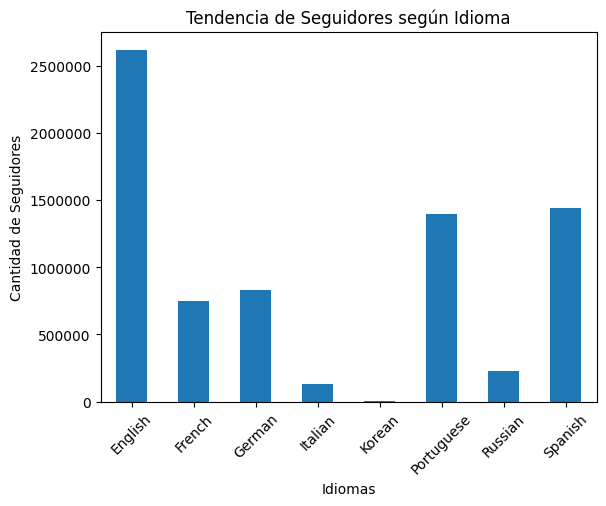

In [28]:
# Actividad 02

# Seleccionar el DataFrame y agrupar segun el “IDIOMA” y calcular la suma de “SEGUIDORES”. Mostrar por consola.
agrupamientoIdioma = df_transmisiones2.groupby("IDIOMA")["SEGUIDORES"].sum()
agrupamientoIdioma

# 4.- Crear un gráfico de barras utilizando como datos, la serie creada. Recorda: 
#      4a.- Agregar un título.
#      4b.- Agregar nombre a las etiquetas de los ejes x e y.
#      4c.- Rotar los nombres de las barras para que se vean horizontales.
#      4d.- Visualizar el gráfico.
#      4e.- Quitar notación cientifica del eje Y.

agrupamientoIdioma.plot.bar()

plt.title('Tendencia de Seguidores según Idioma')
plt.ylabel('Cantidad de Seguidores')
plt.xlabel('Idiomas')
plt.xticks(rotation=45)

# Configurar el formato del eje y para evitar notación científica
plt.ticklabel_format(axis='y', style='plain')

plt.show()

In [29]:
df_transmisiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   FECHA                  509 non-null    datetime64[ns]
 1   NOMBRE_COMPLETO        509 non-null    object        
 2   IDIOMA                 509 non-null    object        
 3   RANGO                  509 non-null    object        
 4   TIEMPO_TRANSMISION     509 non-null    int64         
 5   ESPECTADORES_PROMEDIO  509 non-null    int64         
 6   TIEMPO_VISTA           509 non-null    int64         
 7   VISTAS_GANADAS         509 non-null    int64         
 8   SEGUIDORES             509 non-null    int64         
 9   CATEGORIA_1            508 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 39.9+ KB


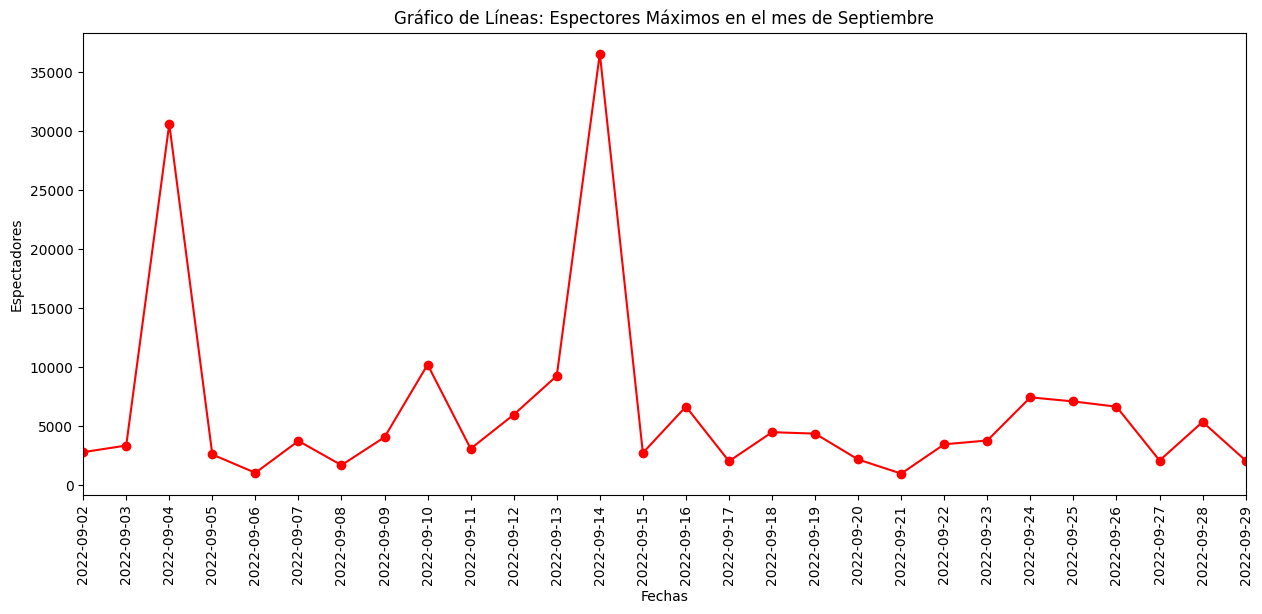

In [37]:
# Actividad 03

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Convertir la columna 'FECHA' a formato datetime para ordenar adecuadamente
df_transmisiones['FECHA'] = pd.to_datetime(df_transmisiones['FECHA'])

# Creamos las mascaras nesesarias
mascaraMin = df_transmisiones["FECHA"] > "2022-9-01"
mascaraMax = df_transmisiones["FECHA"] < "2022-9-30"

df_transmisiones2 = df_transmisiones[mascaraMin & mascaraMax]

agrupamientoTransmisionesSuma = df_transmisiones2.groupby("FECHA")["ESPECTADORES_PROMEDIO"].max()

# Crear el gráfico de líneas
plt.figure(figsize=(15, 6))  # Tamaño del gráfico (opcional, puedes ajustarlo según tus preferencias)

agrupamientoTransmisionesSuma.plot.line(marker='o', color='r')

plt.xlabel('Fechas')
plt.ylabel('Espectadores')
plt.title('Gráfico de Líneas: Espectores Máximos en el mes de Septiembre')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para que sean legibles (opcional)

# Lineas de código, para ver todas las fechas en el eje x
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y-%m-%d"))

# Mostrar el gráfico
plt.show()

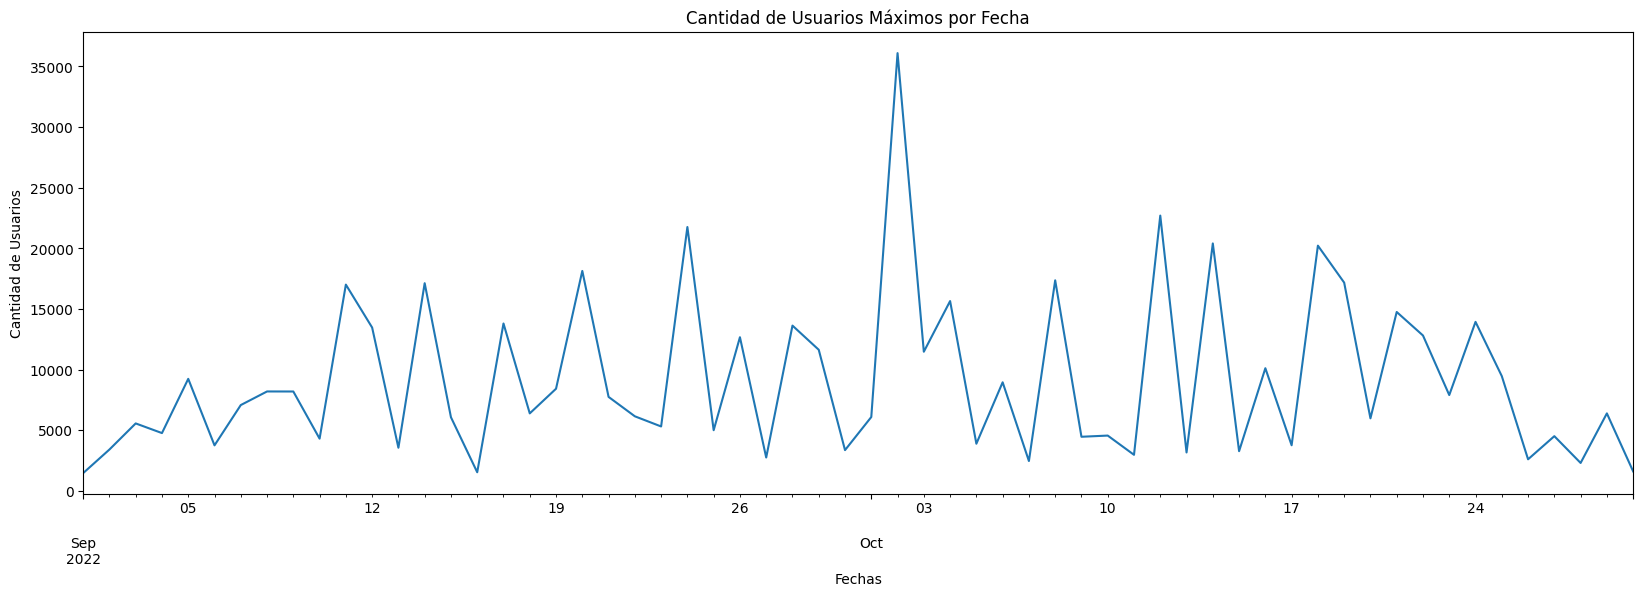

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que ya tienes el DataFrame 'df_transmisiones' y la columna 'FECHA' está en formato datetime

# Ordenar el DataFrame por fecha (opcional, si deseas que las fechas estén en orden en el gráfico)
df_transmisiones.sort_values(by='FECHA', inplace=True)

agrupamientoTransmisionesSuma = df_transmisiones.groupby("FECHA")["ESPECTADORES_PROMEDIO"].sum()

# Generamos el gráfico de líneas
plt.figure(figsize=(20, 6))  # Tamaño del gráfico (opcional, puedes ajustarlo según tus preferencias)

agrupamientoTransmisionesSuma.plot.line()

# Configuramos la visualización
plt.title('Cantidad de Usuarios Máximos por Fecha')
plt.ylabel('Cantidad de Usuarios')
plt.xlabel('Fechas')

# Convertir las fechas a formato de cadena (str) para las etiquetas del eje x
fechas_str = [fecha.strftime('%Y-%m-%d') for fecha in agrupamientoTransmisionesSuma.index]

#plt.tight_layout()  # Ajustar el espaciado para mostrar todas las etiquetas

plt.show()


In [20]:
# Exportamos los datos finales
#data3.to_csv("Streamers Twitch.csv", encoding="utf-8", index=False)